In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [2]:
#######################################################################################
#### Computing JUNO's median sensitivity to the Neutrino's Mass Ordering over time ####
#######################################################################################

# --- Generates the plots shown in Figure 5.5 --- #

def sens_over_time(chi2_TONO_tNO, chi2_TONO_tIO, chi2_TOIO_tNO, chi2_TOIO_tIO):
    
    # Initializing list to store the median sensitivities
    sens_m_list = []
    
    # --- Inverted Ordering Rejection (H1 = NO) --- #
    
    # Large value for χ²(IO) minimum value search
    chi_min = 1e10
    
    # List to store χ²(IO) min for each time t
    chis_min_WO_list = []
    
    for t in range(len(chi2_TONO_tIO)):
        # Looping over all the grid points (i, j, k, l) for each time
        for i in range(len(chi2_TONO_tIO[0])):
            for j in range(len(chi2_TONO_tIO[0][0])):
                for k in range(len(chi2_TONO_tIO[0][0][0])):
                    for l in range(len(chi2_TONO_tIO[0][0][0][0])):
                        # Update χ²(IO) min if a lower value is found
                        if chi2_TONO_tIO[t][i][j][k][l] <= chi_min:
                            chi_min = chi2_TONO_tIO[t][i][j][k][l]
                            i_min = i
                            j_min = j
                            k_min = k
                            l_min = l
        # After scanning all grid points, save χ²(IO) min for this time
        chis_min_WO_list.append(chi2_TONO_tIO[t][i_min][j_min][k_min][l_min])
    
    # Large value for χ²(NO) minimum value search
    chi_min = 1e10
    
    # List to store χ²(NO) min for each time t
    chis_min_TO_list = []
    
    for t in range(len(chi2_TONO_tNO)):
        # Looping over all the grid points (i, j, k, l) for each time
        for i in range(len(chi2_TONO_tNO[0])):
            for j in range(len(chi2_TONO_tNO[0][0])):
                for k in range(len(chi2_TONO_tNO[0][0][0])):
                    for l in range(len(chi2_TONO_tNO[0][0][0][0])):
                        # Update χ²(NO) min if a lower value is found
                        if chi2_TONO_tNO[t][i][j][k][l] <= chi_min:
                            chi_min = chi2_TONO_tNO[t][i][j][k][l]
                            i_min = i
                            j_min = j
                            k_min = k
                            l_min = l
        # After scanning all grid points, save χ²(NO) min for this time                   
        chis_min_TO_list.append(chi2_TONO_tNO[t][i_min][j_min][k_min][l_min])
    
    # Converting lists to numpy arrays
    chis_min_WO_list = np.array(chis_min_WO_list)
    chis_min_TO_list = np.array(chis_min_TO_list)
    
    # Calculating and storing the median sensitivity in rejecting IO for each time t
    sens = chis_min_WO_list - chis_min_TO_list
    sens_m_list.append(np.sqrt(sens))
    
    # --- Normal Ordering Rejection (H1 = IO) --- #
    
    # Large value for χ²(NO) minimum value search
    chi_min = 1e10
    
    # List to store χ²(NO) min for each time t
    chis_min_WO_list = []
    
    for t in range(len(chi2_TOIO_tNO)):
        # Looping over all the grid points (i, j, k, l) for each time
        for i in range(len(chi2_TOIO_tNO[0])):
            for j in range(len(chi2_TOIO_tNO[0][0])):
                for k in range(len(chi2_TOIO_tNO[0][0][0])):
                    for l in range(len(chi2_TOIO_tNO[0][0][0][0])):
                        # Update χ²(NO) min if a lower value is found
                        if chi2_TOIO_tNO[t][i][j][k][l] <= chi_min:
                            chi_min = chi2_TOIO_tNO[t][i][j][k][l]
                            i_min = i
                            j_min = j
                            k_min = k
                            l_min = l
        # After scanning all grid points, save χ²(NO) min for this time
        chis_min_WO_list.append(chi2_TOIO_tNO[t][i_min][j_min][k_min][l_min])
    
    # Large value for χ²(IO) minimum value search
    chi_min = 1e10
    
    # List to store χ²(IO) min for each time t
    chis_min_TO_list = []
    
    for t in range(len(chi2_TOIO_tIO)):
        # Looping over all the grid points (i, j, k, l) for each time
        for i in range(len(chi2_TOIO_tIO[0])):
            for j in range(len(chi2_TOIO_tIO[0][0])):
                for k in range(len(chi2_TOIO_tIO[0][0][0])):
                    for l in range(len(chi2_TOIO_tIO[0][0][0][0])):
                        # Update χ²(IO) min if a lower value is found
                        if chi2_TOIO_tIO[t][i][j][k][l] <= chi_min:
                            chi_min = chi2_TOIO_tIO[t][i][j][k][l]
                            i_min = i
                            j_min = j
                            k_min = k
                            l_min = l
        # After scanning all grid points, save χ²(IO) min for this time
        chis_min_TO_list.append(chi2_TOIO_tIO[t][i_min][j_min][k_min][l_min])
    
    # Converting lists to numpy arrays
    chis_min_WO_list = np.array(chis_min_WO_list)
    chis_min_TO_list = np.array(chis_min_TO_list)
    
    # Calculating and storing the median sensitivity in rejecting IO for each time t
    sens = chis_min_WO_list - chis_min_TO_list
    sens_m_list.append(np.sqrt(sens))
    
    return sens_m_list

In [3]:
# Loading precomputed χ² arrays  
chi2_TONO_tNO = np.load('chi2_TONO_tNO.npy')
chi2_TONO_tIO = np.load('chi2_TONO_tIO.npy')
chi2_TOIO_tNO = np.load('chi2_TOIO_tNO.npy')
chi2_TOIO_tIO = np.load('chi2_TOIO_tIO.npy')

# Computing the median sensitivity curves
sens_m_list_TONO = sens_over_time(chi2_TONO_tNO, chi2_TONO_tIO, chi2_TOIO_tNO, chi2_TOIO_tIO)[0]
sens_m_list_TOIO = sens_over_time(chi2_TONO_tNO, chi2_TONO_tIO, chi2_TOIO_tNO, chi2_TOIO_tIO)[1]

# Defining the time axis in months
inc = 120//len(sens_m_list_TONO)
meses = np.arange(inc, 120+inc, inc)

# Cubic spline interpolation for smooth curves
s_NO = CubicSpline(meses, sens_m_list_TONO)
s_IO = CubicSpline(meses, sens_m_list_TOIO)
meses = np.linspace(min(meses),max(meses), 101)

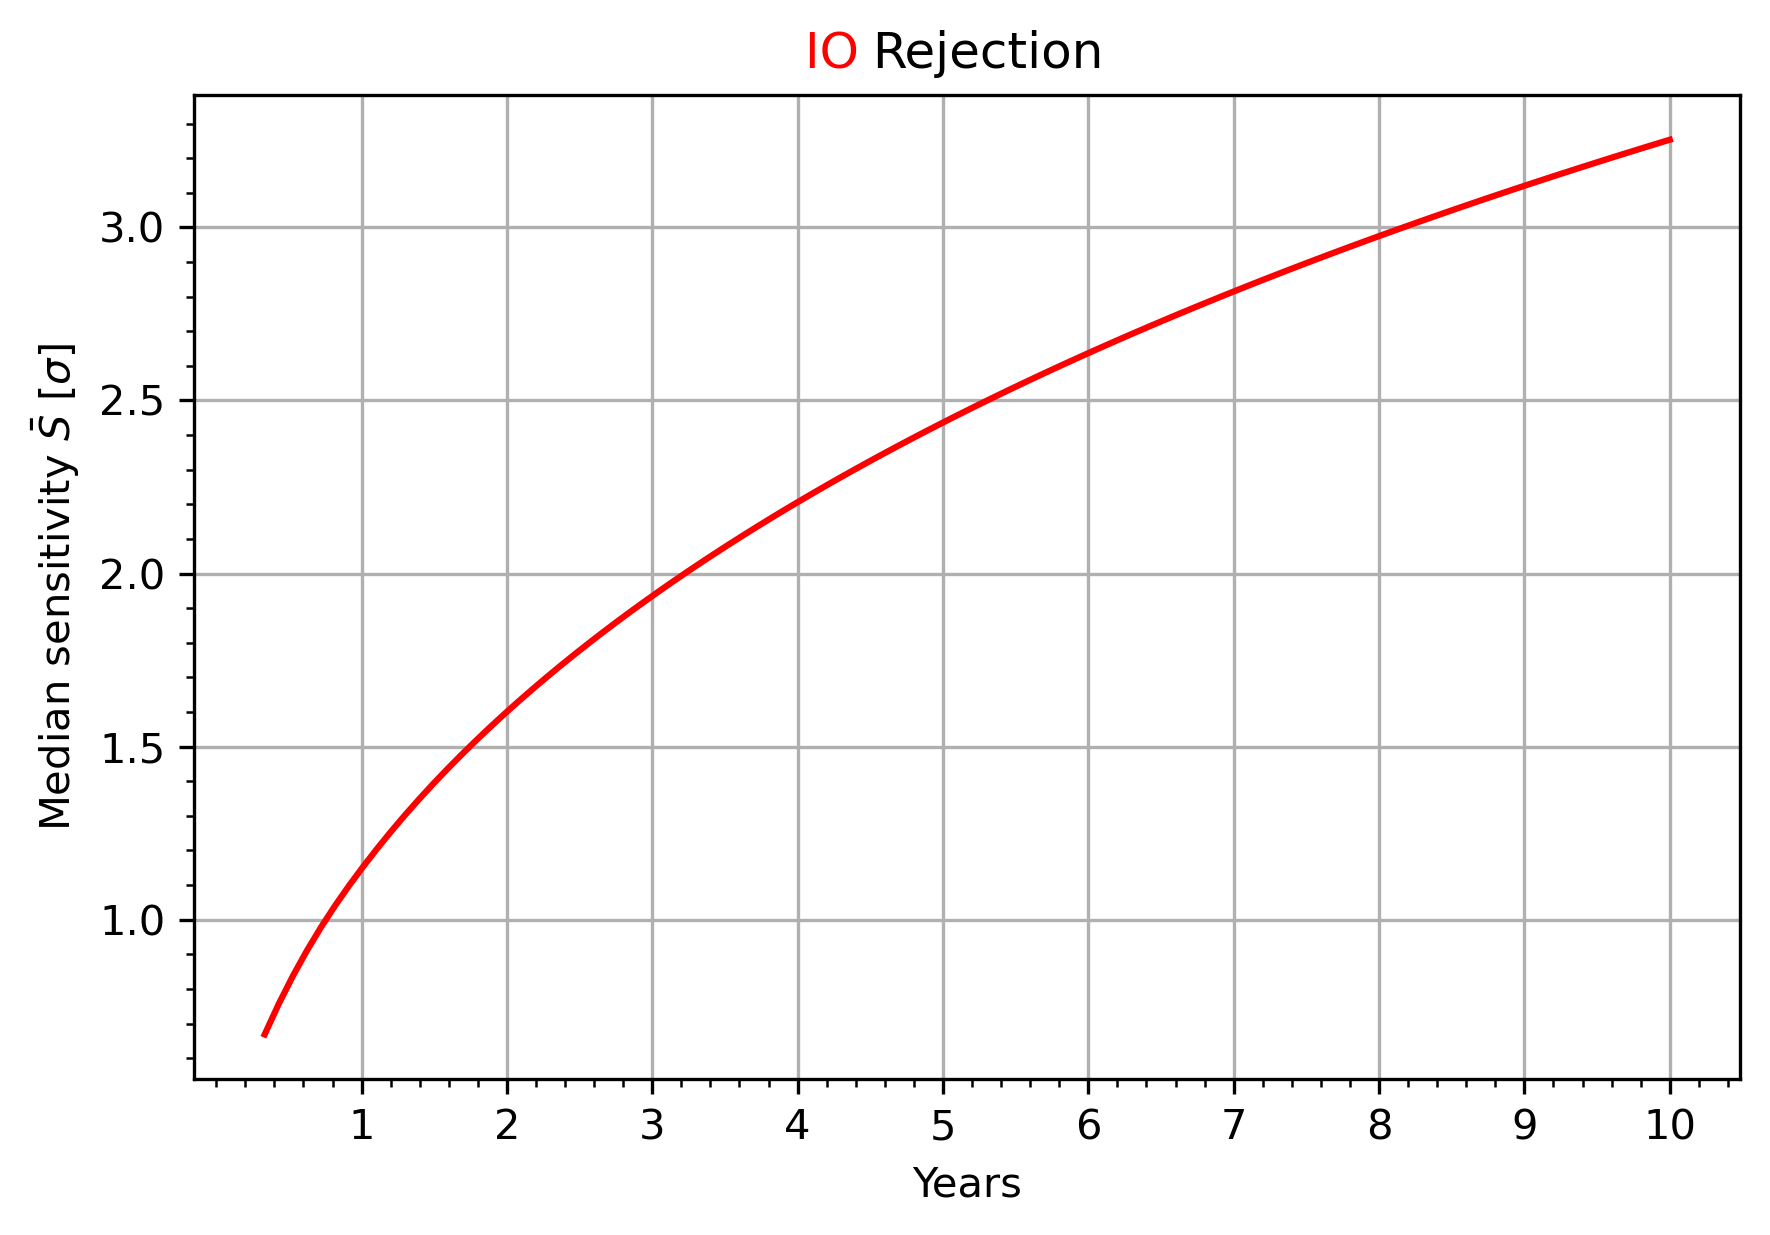

In [4]:
# Plotting
plt.figure(dpi=300)
plt.plot(meses/12, s_NO(meses), 'r')
plt.xlabel('Years')
plt.ylabel(r'$\text{Median sensitivity} \ \bar{S} \ [\sigma]$')
plt.figtext(0.475, 0.985, 'IO ', fontsize='large', color='r', ha ='center')
plt.figtext(0.557, 0.985, 'Rejection', fontsize='large', color='k', ha ='center')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.minorticks_on()
plt.grid()
plt.tight_layout()
plt.show()

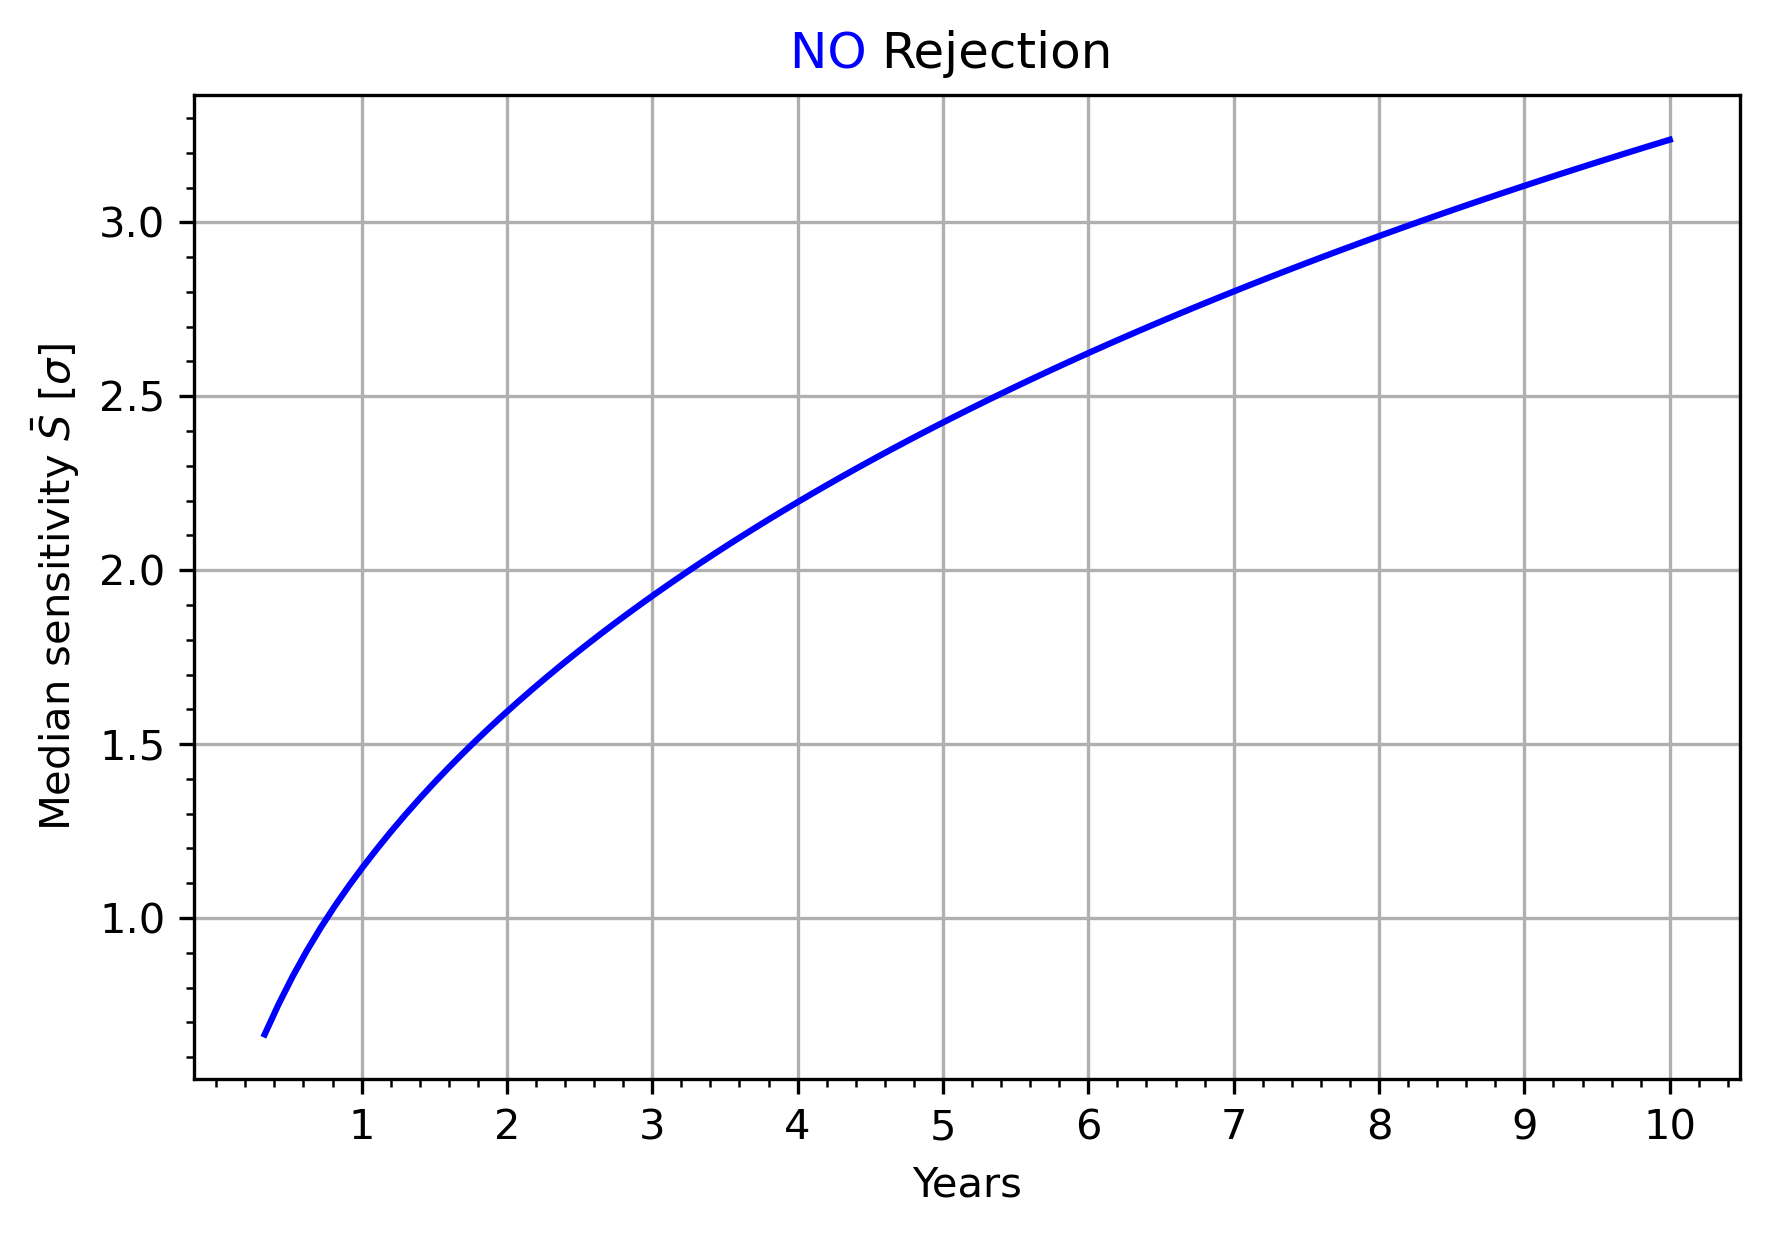

In [5]:
plt.figure(dpi=300)
plt.plot(meses/12, s_IO(meses), 'b')
plt.xlabel('Years')
plt.ylabel(r'$\text{Median sensitivity} \ \bar{S} \ [\sigma]$')
plt.figtext(0.473, 0.985, 'NO ', fontsize='large', color='b', ha ='center')
plt.figtext(0.562, 0.985, 'Rejection', fontsize='large', color='k', ha ='center')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.minorticks_on()
plt.grid()
plt.tight_layout()
plt.show()

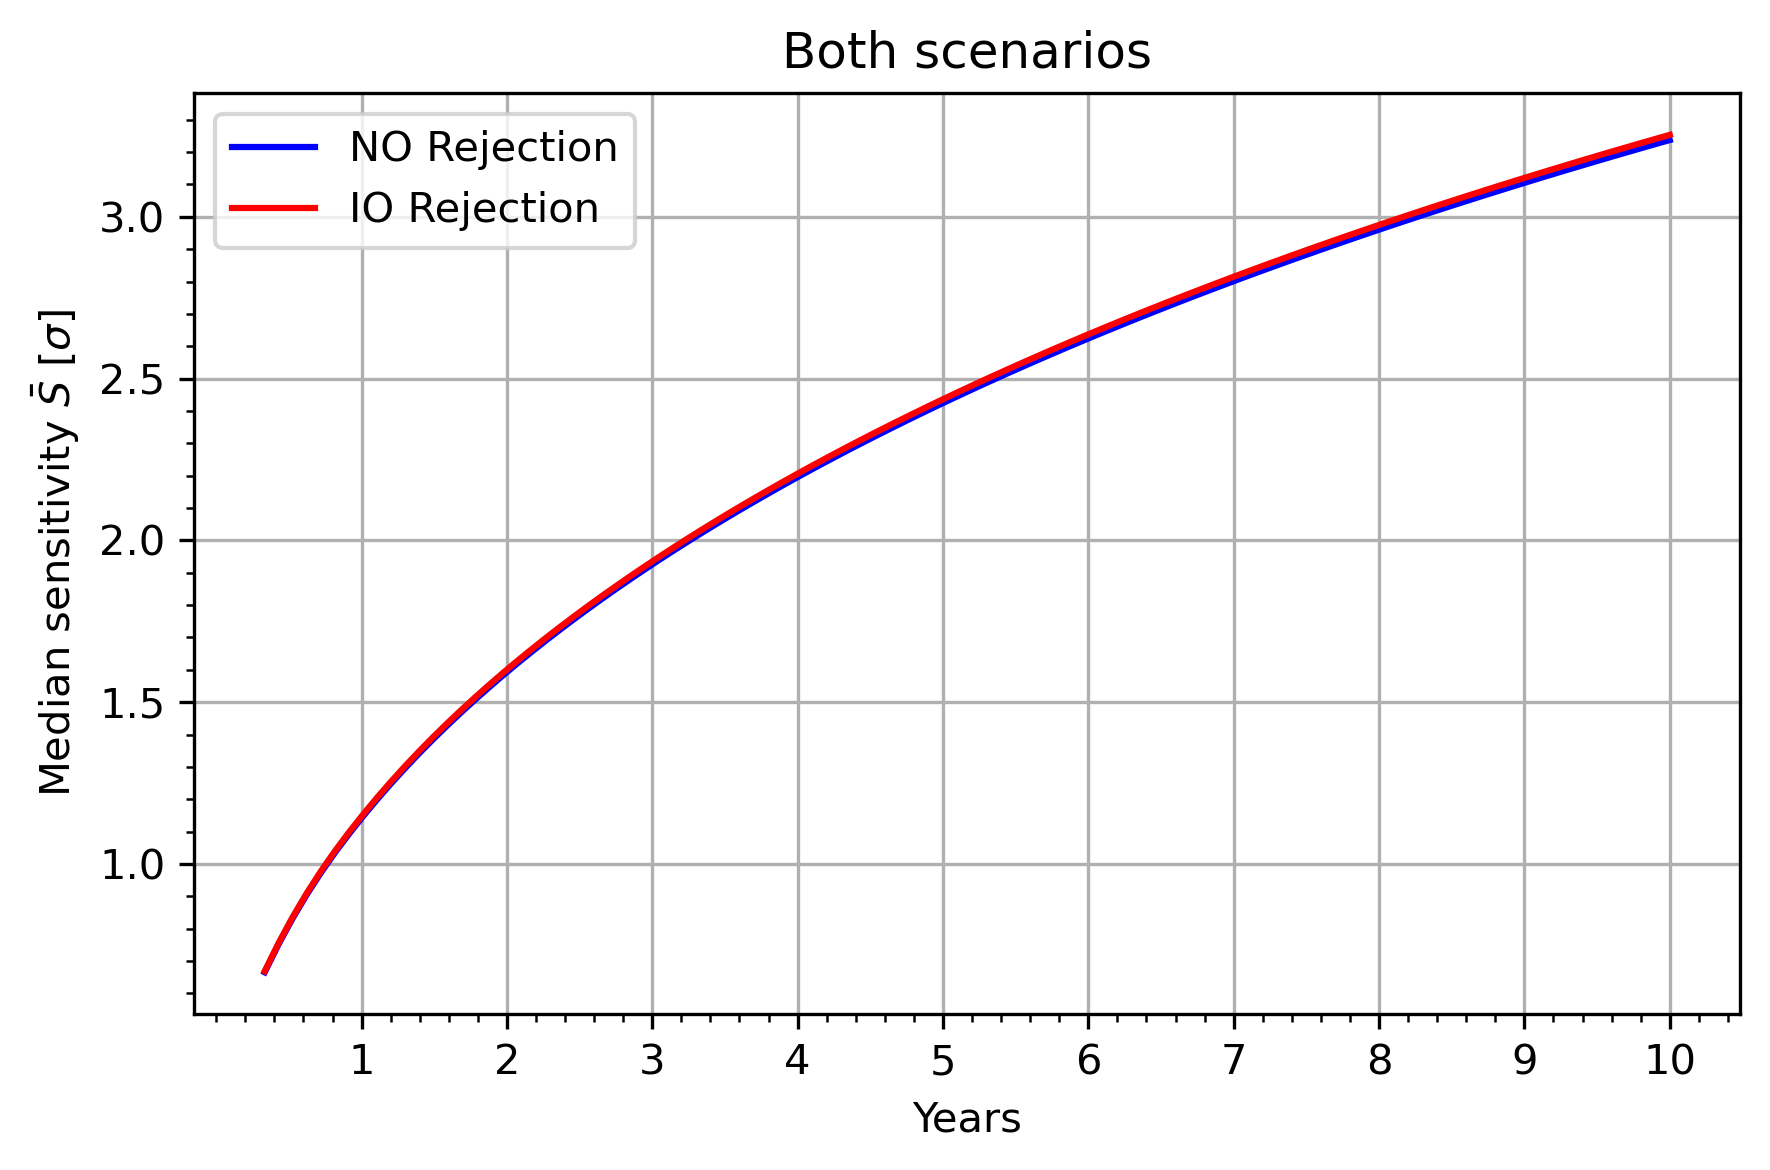

In [6]:
plt.figure(dpi=300)
plt.plot(meses/12, s_IO(meses), 'b', label = 'NO Rejection')
plt.plot(meses/12, s_NO(meses), 'r', label = 'IO Rejection')
plt.xlabel('Years')
plt.ylabel(r'$\text{Median sensitivity} \ \bar{S} \ [\sigma]$')
plt.title('Both scenarios')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.minorticks_on()
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()